In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Let's start by reading the Bitcoin and Ether data:


In [2]:
df=pd.read_csv(
    'data/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [3]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


let's run simple visualization:

<Axes: xlabel='Timestamp'>

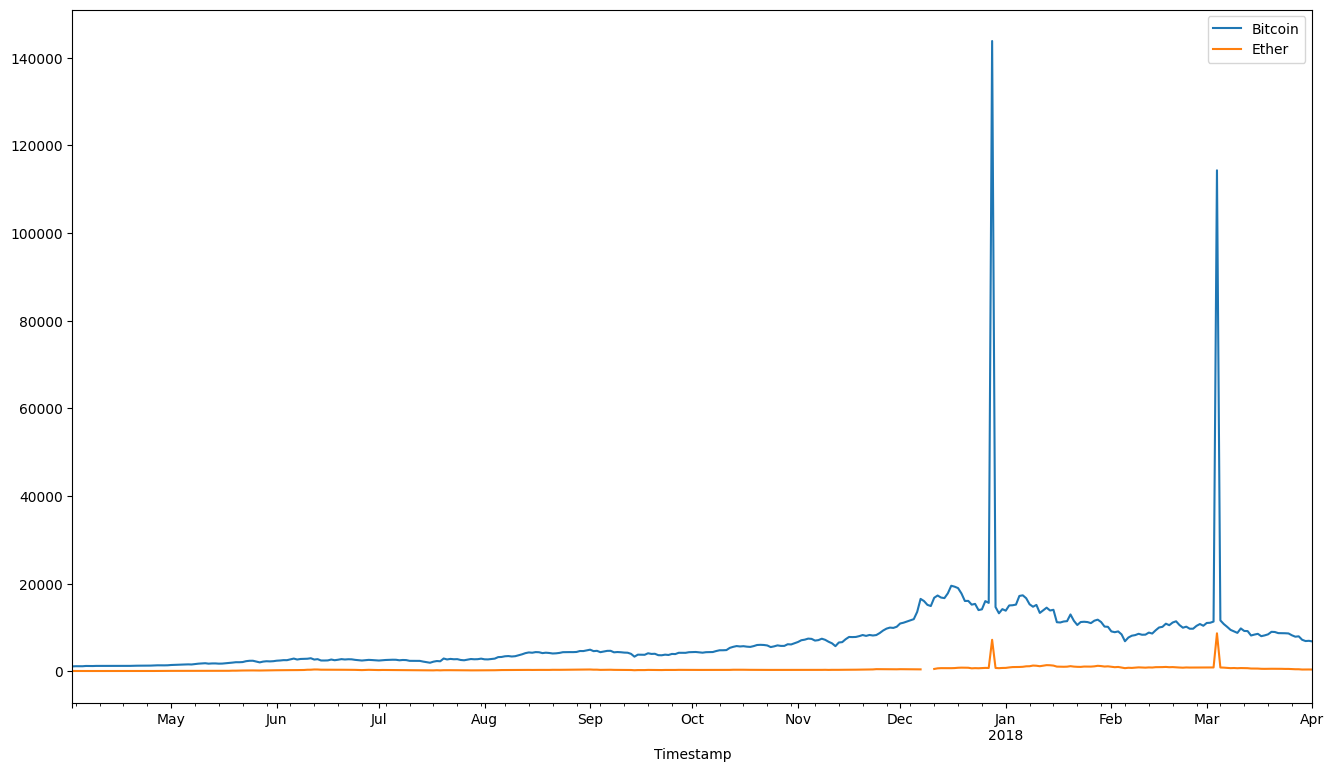

In [4]:
df.plot(figsize=(16,9))

<Axes: xlabel='Timestamp'>

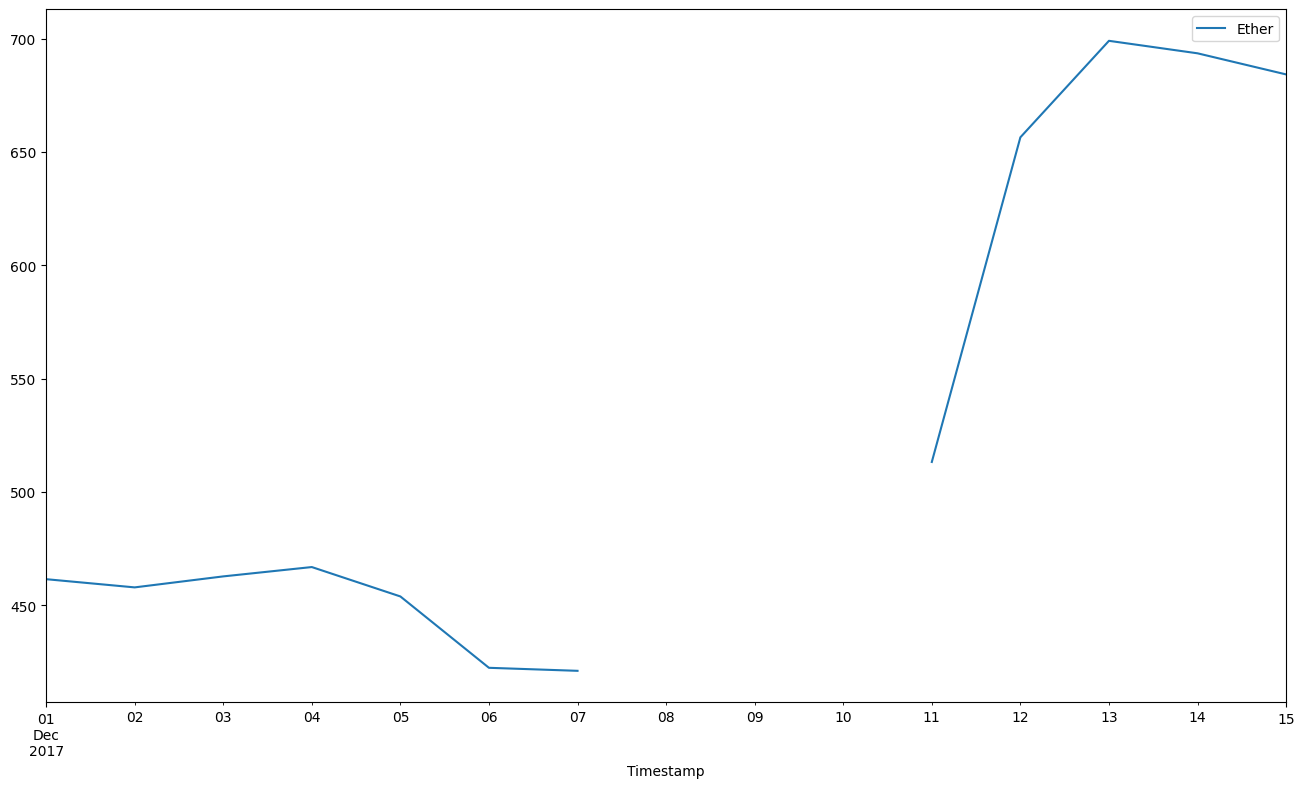

In [5]:
df.loc['2017-12':'2017-12-15'].plot(y='Ether',figsize=(16,9))

In [6]:
df_na=df.loc['2017-12':'2017-12-15']

df_na

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


In [7]:
df_na['Ether'].isnull().values.any() #you can use isna() also

True

In [8]:
df_na[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


let's add a little bit more context:

In [9]:
df.loc['2017-12-06':'2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will we use as fill value? For now, let's consider the price of the ether remained constant.

In [10]:
df.loc['2017-12-06':'2017-12-12'].ffill()

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,421.15
2017-12-09,15142.834152,421.15
2017-12-10,14869.805000,421.15
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [11]:
df.ffill(inplace=True)

let's take a look now:

<Axes: xlabel='Timestamp'>

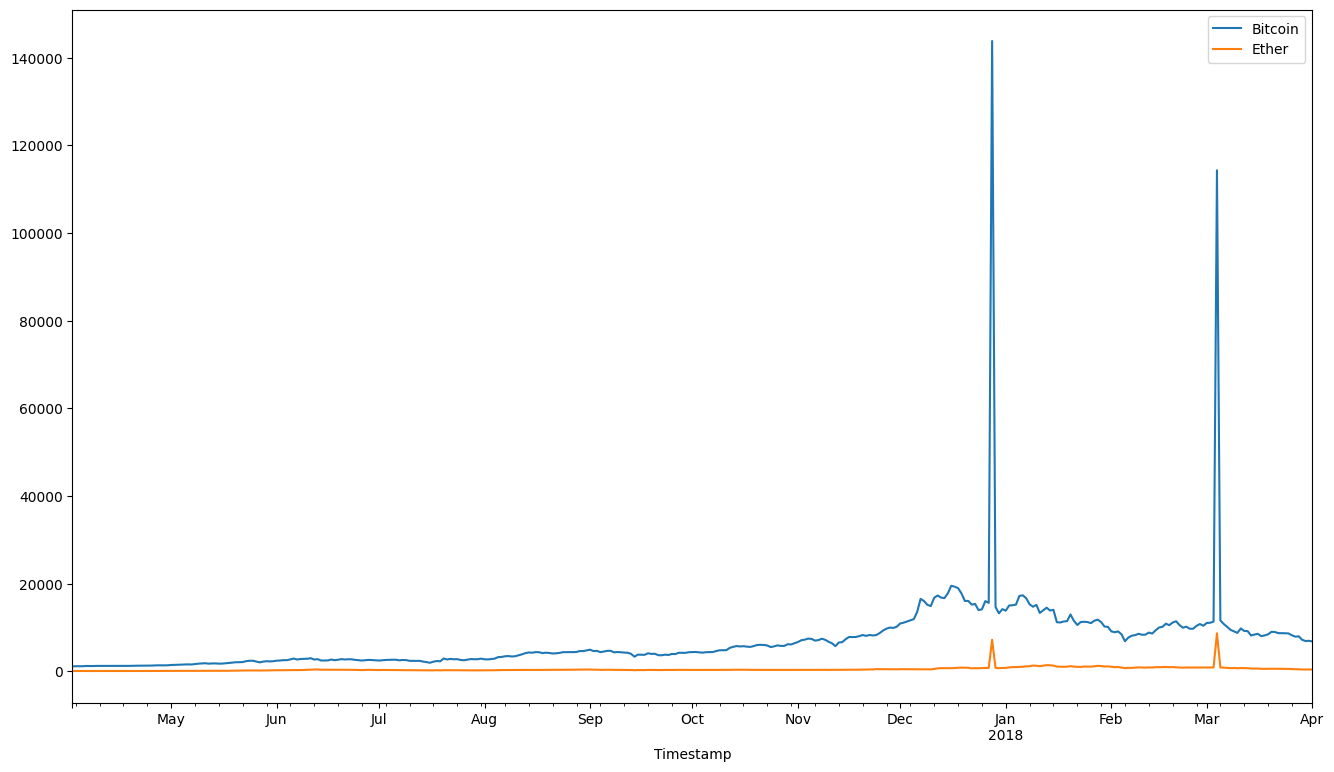

In [12]:
df.plot(figsize=(16,9))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of `Dec 2017` and first of `March 2018`.

<Axes: xlabel='Timestamp'>

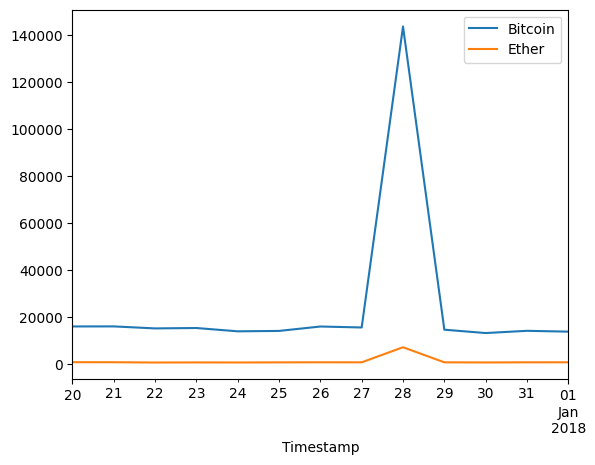

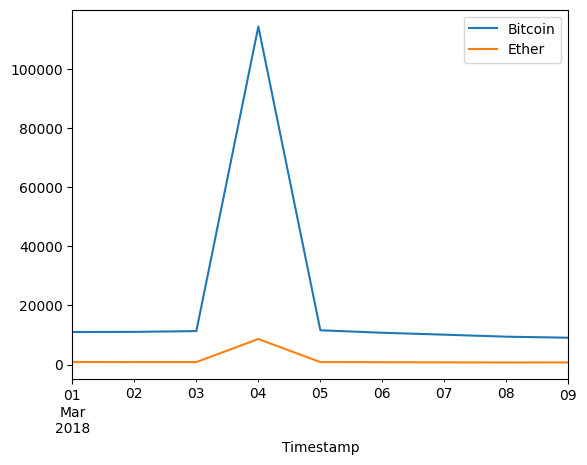

In [13]:

df.loc['2017-12-20':'2018-01-01'].plot()
df.loc['2018-03':'2018-03-09'].plot()

In [14]:
df_cleaned=df.drop(index=['2017-12-28','2018-03-04'])

<Axes: xlabel='Timestamp'>

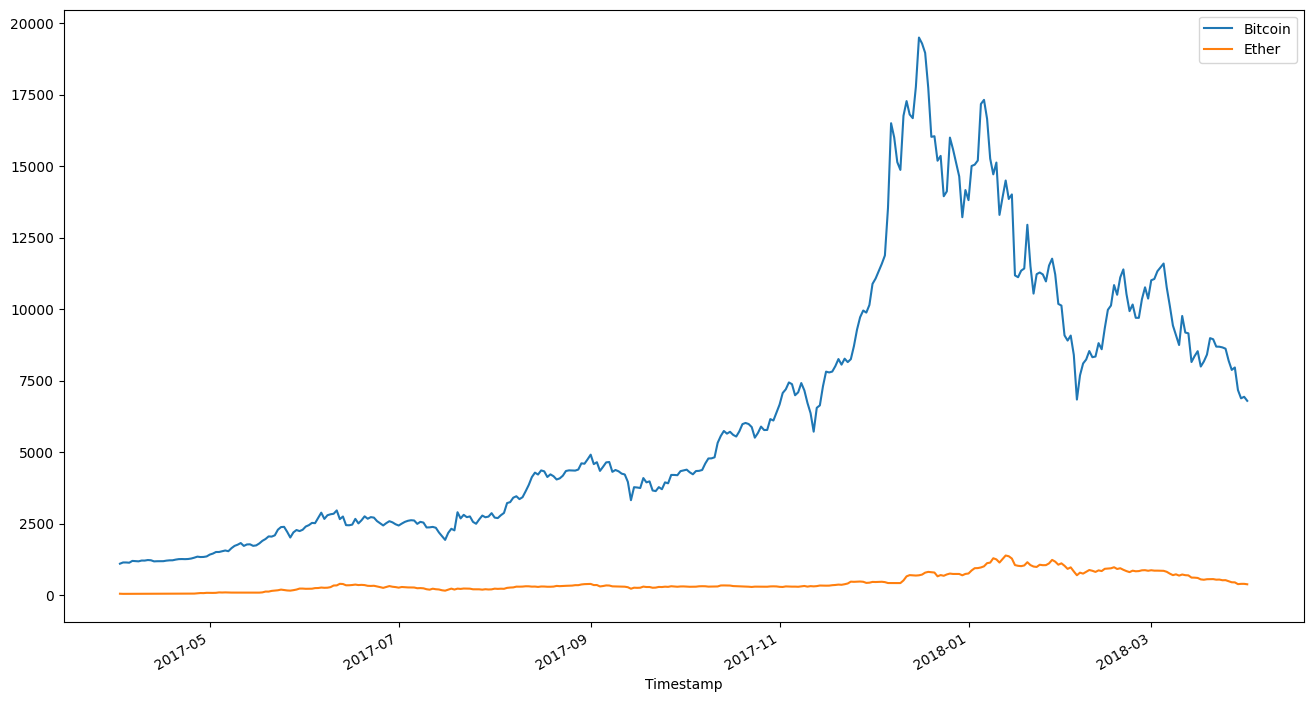

In [15]:
df_cleaned.plot(figsize=(16,9))

### **Cleaning Analysis**

Visualization helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use analytical methods to identify these outliers or these skewed values.

#### **Central Tendency**

We'll use a set of common indicators to measure central tendency and identify these outliers:

**mean**
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:

In [16]:
df.mean()

Bitcoin    6996.004022
Ether       468.851753
dtype: float64

Bot the values seem to be high. That's because the outliers are skewing with the mean:

In [17]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       427.866915
dtype: float64

**median**

In [18]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

**mode** 

It doesn't make much sense to measure the mode, as we have continuous values. But you van do it just with `df.mode()`

#### **Visualizing distirbution**

Now we can use a few of the charts that we saw before + seaborn to visualize the distribution of our values. In particular, we're interested in **histograms:**

<Axes: ylabel='Frequency'>

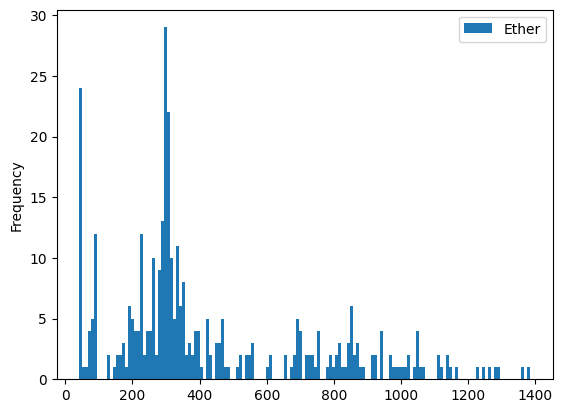

In [19]:
df_cleaned.plot(kind='hist',y='Ether',bins=150)

<Axes: ylabel='Frequency'>

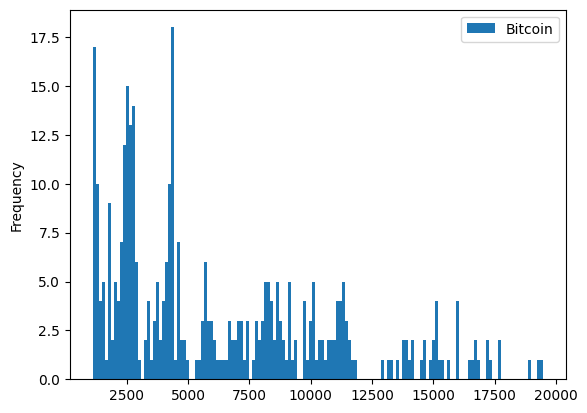

In [20]:
df_cleaned.plot(kind='hist',y='Bitcoin',bins=150)

/home/daidon/.local/lib/python3.10/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


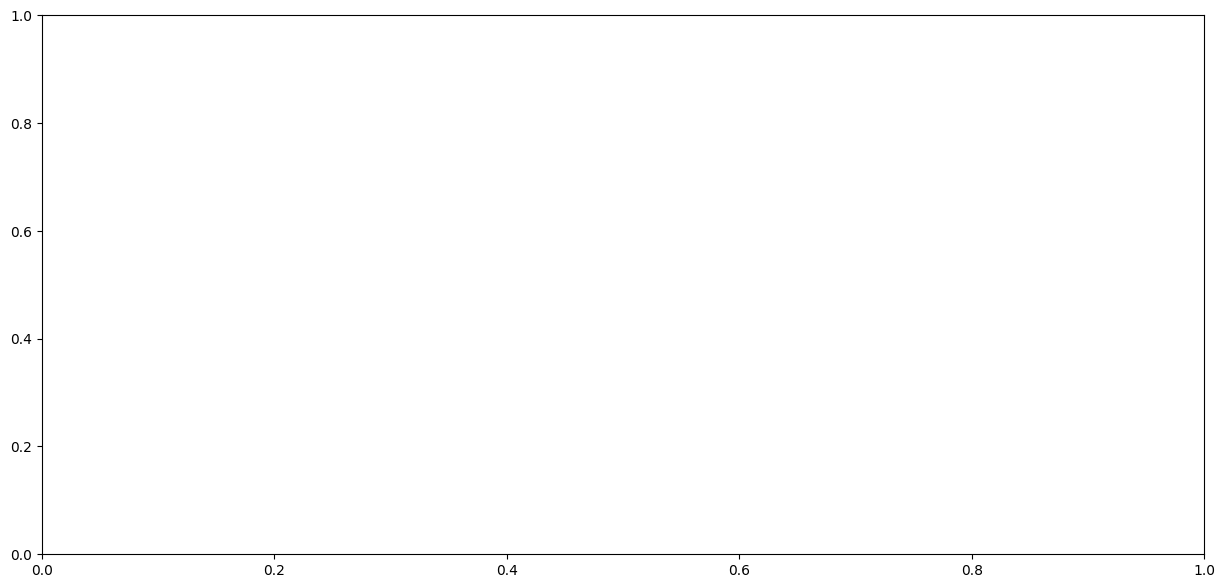

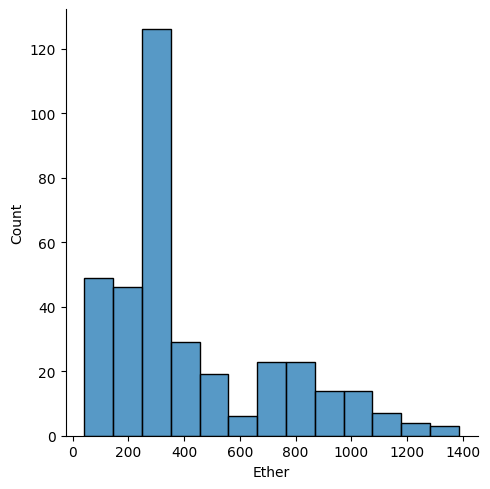

In [21]:
fig, ax=plt.subplots(figsize=(15,7))
sns.displot(df_cleaned['Ether'],ax=ax)

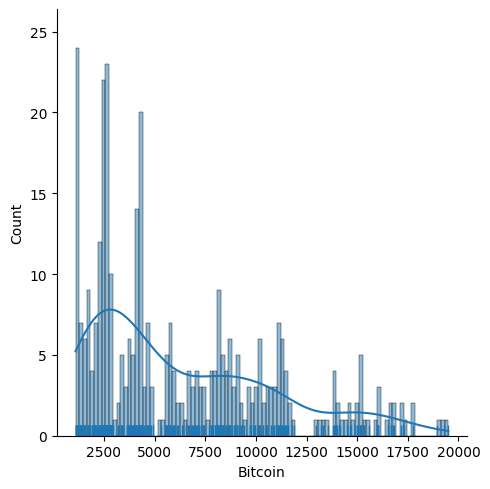

In [22]:
sns.displot(df_cleaned,x='Bitcoin',bins=100,rug=True,kde=True)

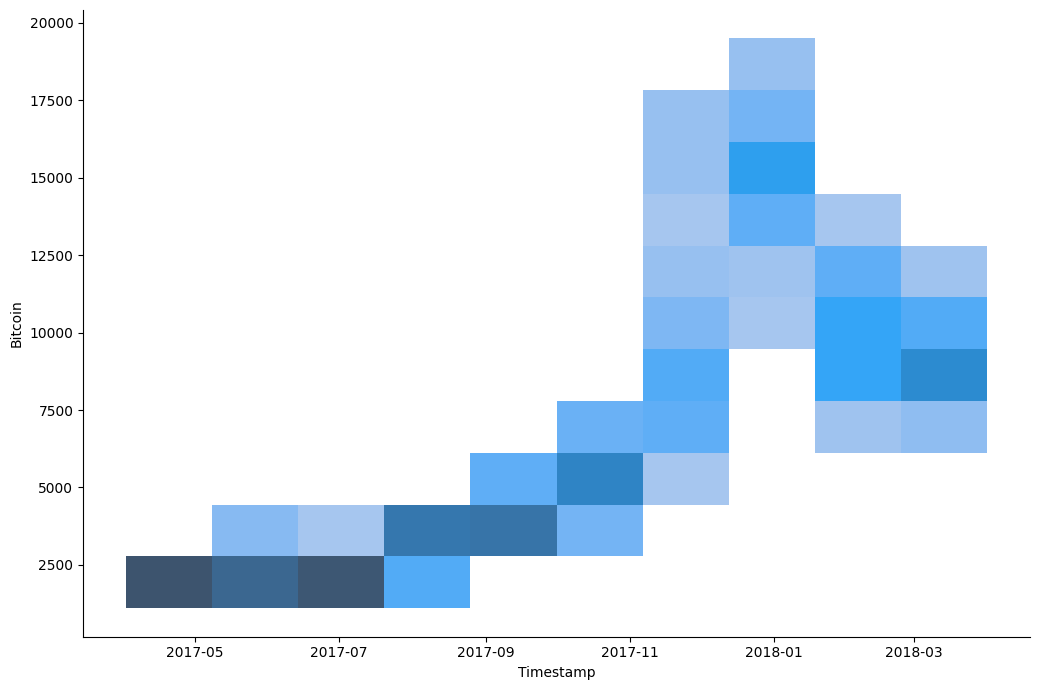

In [23]:
sns.displot(data=df_cleaned,x='Timestamp',y='Bitcoin',height=7,aspect=1.5)

Seaborn's `displot` is a general method that will plot a histogram, a KDE and a rugplot. You can also use them separately:

<Axes: xlabel='Ether', ylabel='Density'>

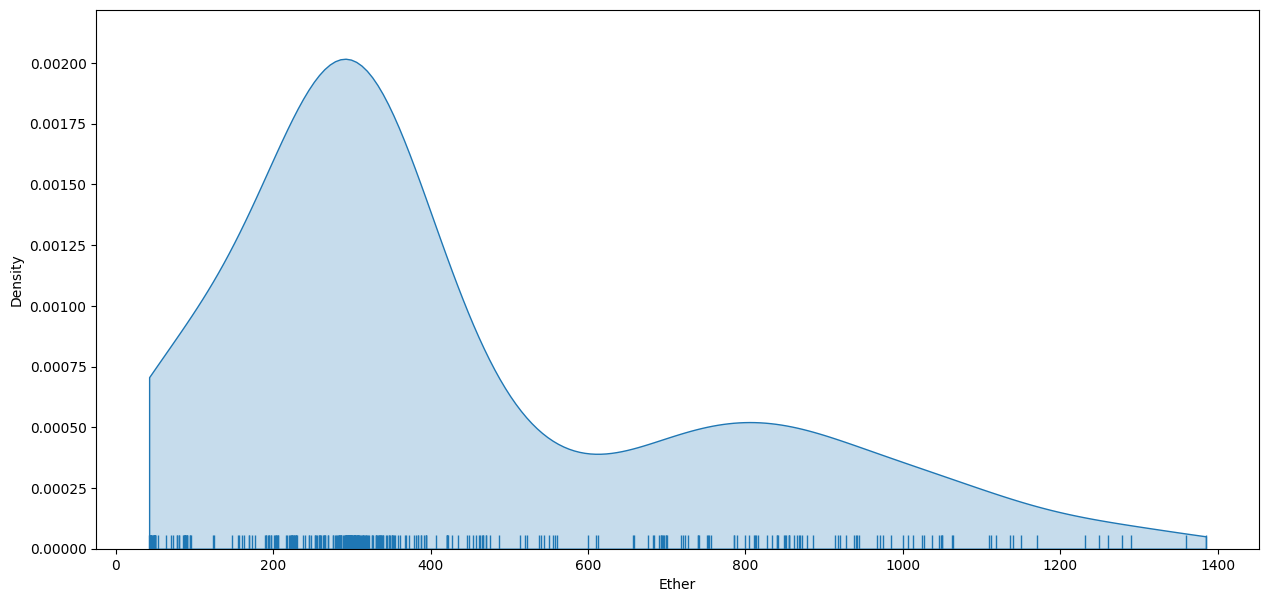

In [24]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], fill=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax)

### **HeatMap**

In [33]:
#import breast cancer data from scikit-learn
from sklearn.datasets import load_breast_cancer

#load breast cancer dataset
data=load_breast_cancer()


In [34]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.iloc[0:5,0:3]

,mean radius,mean texture,mean perimeter
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10


In [37]:
#compute correlation matrix using pandas corr() function
corr_df=df.corr().round(1)
corr_df.iloc[0:5,0:3]

,mean radius,mean texture,mean perimeter
mean radius,1.0,0.3,1.0
mean texture,0.3,1.0,0.3
mean perimeter,1.0,0.3,1.0
mean area,1.0,0.3,1.0
mean smoothness,0.2,-0.0,0.2


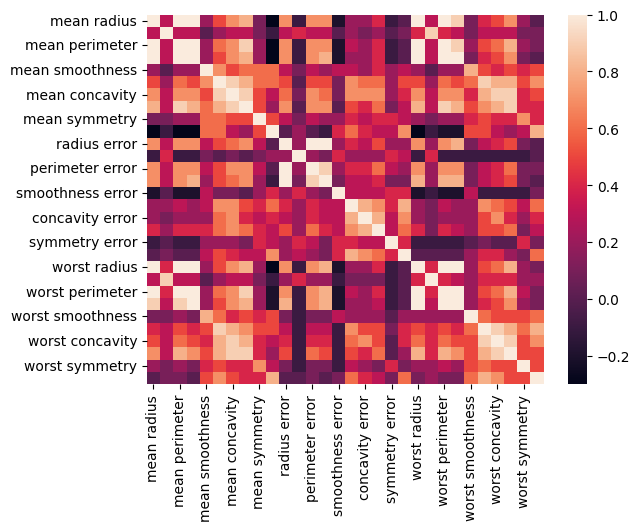

In [38]:
hmap=sns.heatmap(corr_df)

#### **Numpy's tril() function to extract Lower Triangle Matrix**

We will use np.tril() function with np.ones() function to create a boolean matrix with same size as our correlation matrix. The boolean matrix will have True values on lower triangle matrix and False on upper triangle matrix.

**`np.triu() is same but for upper triangle`**

In [41]:
np.tril(np.ones(corr_df.shape)).astype(bool)[0:5,0:5]

array([[ True, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True]])

In [46]:
df_lowerT=corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
df_lowerT.iloc[0:5,0:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.0,NaN,NaN,NaN,NaN
mean texture,0.3,1.0,NaN,NaN,NaN
mean perimeter,1.0,0.3,1.0,NaN,NaN
mean area,1.0,0.3,1.0,1.0,NaN
mean smoothness,0.2,-0.0,0.2,0.2,1.0


<Axes: >

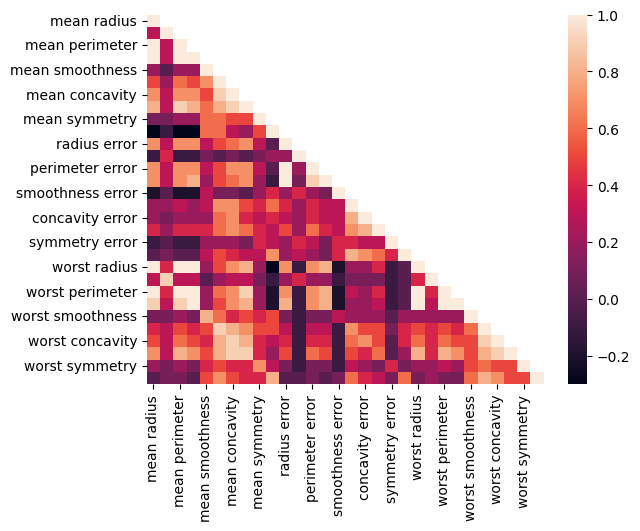

In [54]:
sns.heatmap(df_lowerT)

#### **Upper Triangle**

In [60]:
df_upperT=corr_df.where(np.triu(np.ones(corr_df.shape)).astype(bool))

<Axes: >

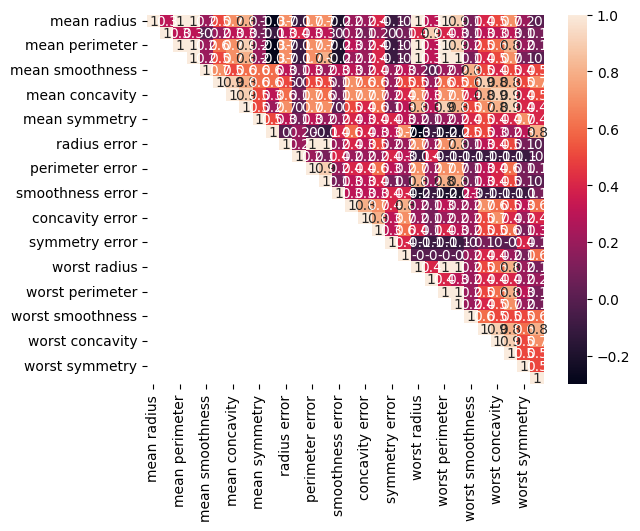

In [62]:
sns.heatmap(df_upperT,annot=True)